In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from wifi import *
import inspect
import warnings
from unittest.mock import patch
warnings.filterwarnings('ignore') # yolo!

# STFU matplotlib
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info

In [3]:
print(inspect.getdoc(convolutional_coder))

Convolutional coder uses the data-stream to traverse the well-known state machine.
Instead of data, the output of each state transition is transmitted.

Note that each new data bit triggers a state change, which contributes 2 bits to output i.e. data rate is
icreased by 2.

Receiver can use the 'logic' of the state transition to detect and fix the bit errors. Or in other words, choose the most probable path
Receiver can undo the state transition and fix errors.
Conv coding increases data rate by 2 or in other works, transmittion efficientcy drops to 50%.

There is more and better information in 'doc/conv_coding_MIT6_02F12_chap07.pdf' and 'doc/conv_decoding_MIT6_02F12_chap08.pdf'.

Conv coding increases the PER(packet error rate) by ~6dB - which is the amount neede to double the link distance. In this sense
we trade efficientcy to link distance or well robustness.


# Influence to Packet error rate

100%|██████████| 13/13 [00:17<00:00,  1.35s/it]


<IPython.core.display.Javascript object>


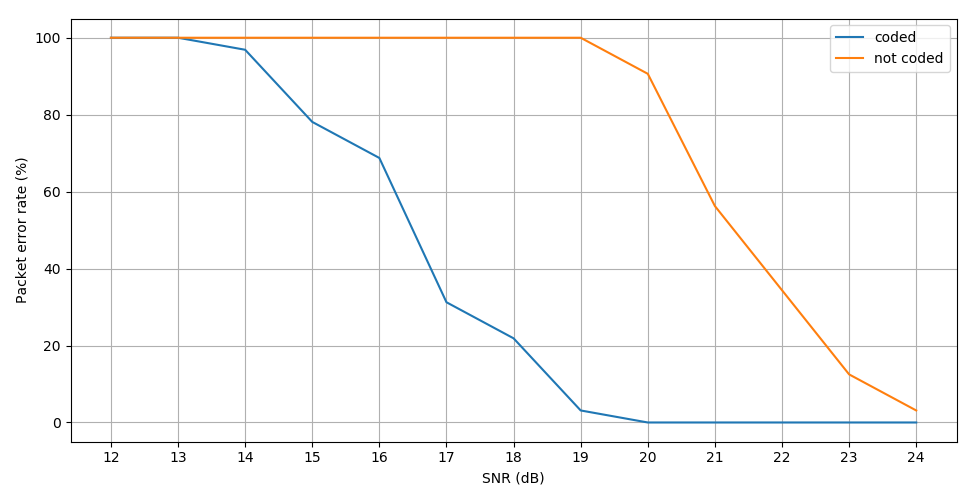

In [5]:
from loguru import logger
logger.disable('wifi')

data = b'\n17. Orthogonal frequency division multiplexing (OFDM) PHY specification\n17.1 Introduction\n17.1.1 General\nThis clause specifies the PHY entity for an orthogonal frequency division multiplexing (OFDM) system.\nThe OFDM system provides a WLAN with data payload communication capabilities of 6, 9, 12, 18, 24, 36,\n48, and 54 Mb/s. The support of transmitting and receiving at data rates of 6, 12, and 24 Mb/s is mandatory.\nThe system uses 52 subcarriers that are modulated using binary or quadrature phase shift keying (BPSK or\nQPSK) or using 16- or 64-quadrature amplitude modulation (16-QAM or 64-QAM). Forward error\ncorrection coding (convolutional coding) is used with a coding rate of 1/2, 2/3, or 3/4.\nThe OFDM system also provides a "half-clocked" operation using 10 MHz channel spacings with data\ncommunications capabilities of 3, 4.5, 6, 9, 12, 18, 24, and 27 Mb/s. The support of transmitting and\nreceiving at data rates of 3, 6, and 12 Mb/s is mandatory when using 10 MHz channel spacing. The half-\nclocked operation doubles symbol times and clear channel assessment (CCA) times when using 10 MHz\nchannel spacing. The regulatory requirements and information regarding use of this OFDM PHY are in\nAnnex D and Annex E.\nThe OFDM system also provides a "quarter-clocked" operation using 5 MHz channel spacing with data\ncommunication capabilities of 1.5, 2.25, 3, 4.5, 6, 9, 12, and 13.5 Mb/s. The support of transmitting and\nreceiving at data rates of 1.5, 3, and 6 Mb/s is mandatory when using 5 MHz channel spacing. The quarter-\nclocked operation quadruples symbol times and CCA times when using 5 MHz channel spacing. The\nregulatory requirements and information regarding use of this OFDM PHY are in Annex D and Annex E.\n17.1.2 Scope\nSubclause 17.1 describes the PHY services provided to the IEEE 802.11 WLAN MAC by the OFDM PHY.\nThe OFDM PHY consists of the following protocol functions:\na) A function that defines a method of mapping the IEEE 802.11 PSDUs into a framing format suitable\nfor sending and receiving user data and management information between two or more STAs.\nb) A function that defines the characteristics and method of transmitting and receiving data through a\nWM between two or more STAs, each using the OFDM system.\n17.1.3 OFDM PHY functions\n17.1.3.1 General\nThe OFDM PHY architecture is depicted in the reference model shown in Figure 4-19 (in 4.9). The OFDM\nPHY contains two functional entities: the PHY function and the layer management function. Each of these\nfunctions is described in detail in 17.3 and 17.4.\nThe OFDM PHY service is provided to the MAC through the PHY service primitives described in Clause 8.\n17.1.3.2 PLME\nThe PLME performs management of the local PHY functions in conjunction with the MLME.\n2277\nCopyright  2016 IEEE. All rights reserved.\nAuthorized licensed use limited to: Vadis Slaav. Downloaded on September 30,2018 at 13:57:05 UTC from IEEE Xplore. Restrictions apply.IEEE Std 802.11-2016\nIEEE Standard for Information Technology-Local and Metropolitan Area Networks-Specific Requirements\nPart 11: Wireless LAN MAC and PHY Specifications\n17.1.3.3 Service specification method\nThe models represented by figures and state diagrams are intended to be illustrations of the functions\nprovided. It is important to distinguish between a model and a real implementation. The models are\noptimized for simplicity and clarity of presentation, but do not necessarily reflect any particular\nimplementation.\nThe service of a layer or sublayer is the set of capabilities that it offers to a user in the next higher layer (or\nsublayer). Abstract services are specified here by describing the service primitives and parameters that\ncharacterize each service. This definition is independent of any particular implementation.\n17.2 OFDM PHY specific service parameter list\n17.2.1 Introduction\nThe architecture of the IEEE 802.11 MAC is intended to be PHY independent. Some PHY implementations\nrequire medium management state machines running in the MAC sublayer in order to meet certain PHY\nrequirements. These PHY-dependent MAC state machines reside in a '
data = data[:1024]
data = bitstr.from_bytes(data)

data_rate = 24 # this rate has no puncturing
snr_range = range(12,25)
ber_normal = packet_error_rate.do(data, data_rate, snr_range)

# disable coder. Note that following code expects coder to increase data amount by 2, for this i just duplicate the input data.
with patch('wifi.convolutional_coder.do', lambda x: x + x):
    with patch('wifi.convolutional_coder.undo', lambda x: x[:len(x)//2]):
        ber_no_scrambler = packet_error_rate.do(data, data_rate, snr_range)
        
plt.figure(figsize=(9.75, 5))
plt.plot(snr_range, ber_normal.values(), label='coded')
plt.plot(snr_range, ber_no_scrambler.values(), label='not coded')
plt.xticks(snr_range)
plt.xlabel('SNR (dB)')
plt.ylabel('Packet error rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Robustness to time-domain interference

<IPython.core.display.Javascript object>


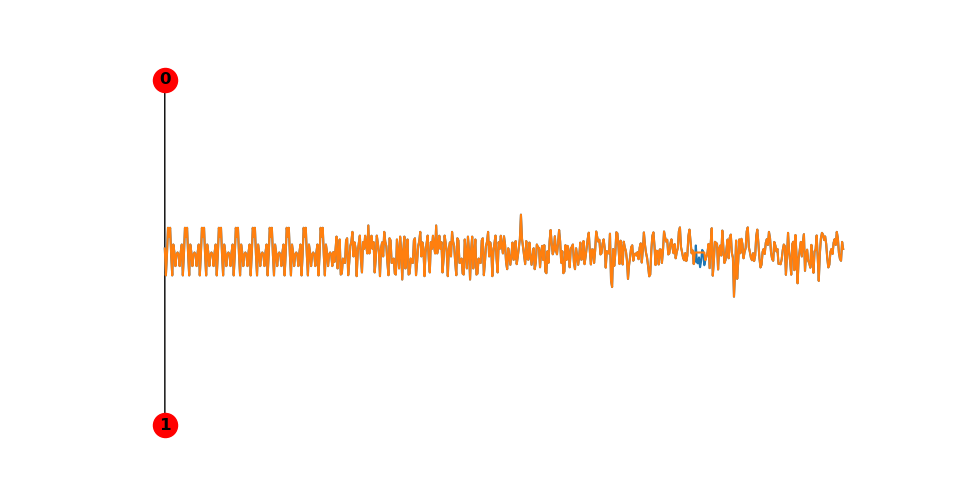

b'\n17. Orthogonal?\xa6requency divisi'
b'\n17. Orthogonal frequency divisi'


In [61]:
data = b'\n17. Orthogonal frequency division multiplexing (OFDM) PHY specification\n17.1 Introduction\n17.1.1 General\nThis clause specifies the PHY entity for an orthogonal frequency division multiplexing (OFDM) system.\nThe OFDM system provides a WLAN with data payload communication capabilities of 6, 9, 12, 18, 24, 36,\n48, and 54 Mb/s. The support of transmitting and receiving at data rates of 6, 12, and 24 Mb/s is mandatory.\nThe system uses 52 subcarriers that are modulated using binary or quadrature phase shift keying (BPSK or\nQPSK) or using 16- or 64-quadrature amplitude modulation (16-QAM or 64-QAM). Forward error\ncorrection coding (convolutional coding) is used with a coding rate of 1/2, 2/3, or 3/4.\nThe OFDM system also provides a "half-clocked" operation using 10 MHz channel spacings with data\ncommunications capabilities of 3, 4.5, 6, 9, 12, 18, 24, and 27 Mb/s. The support of transmitting and\nreceiving at data rates of 3, 6, and 12 Mb/s is mandatory when using 10 MHz channel spacing. The half-\nclocked operation doubles symbol times and clear channel assessment (CCA) times when using 10 MHz\nchannel spacing. The regulatory requirements and information regarding use of this OFDM PHY are in\nAnnex D and Annex E.\nThe OFDM system also provides a "quarter-clocked" operation using 5 MHz channel spacing with data\ncommunication capabilities of 1.5, 2.25, 3, 4.5, 6, 9, 12, and 13.5 Mb/s. The support of transmitting and\nreceiving at data rates of 1.5, 3, and 6 Mb/s is mandatory when using 5 MHz channel spacing. The quarter-\nclocked operation quadruples symbol times and CCA times when using 5 MHz channel spacing. The\nregulatory requirements and information regarding use of this OFDM PHY are in Annex D and Annex E.\n17.1.2 Scope\nSubclause 17.1 describes the PHY services provided to the IEEE 802.11 WLAN MAC by the OFDM PHY.\nThe OFDM PHY consists of the following protocol functions:\na) A function that defines a method of mapping the IEEE 802.11 PSDUs into a framing format suitable\nfor sending and receiving user data and management information between two or more STAs.\nb) A function that defines the characteristics and method of transmitting and receiving data through a\nWM between two or more STAs, each using the OFDM system.\n17.1.3 OFDM PHY functions\n17.1.3.1 General\nThe OFDM PHY architecture is depicted in the reference model shown in Figure 4-19 (in 4.9). The OFDM\nPHY contains two functional entities: the PHY function and the layer management function. Each of these\nfunctions is described in detail in 17.3 and 17.4.\nThe OFDM PHY service is provided to the MAC through the PHY service primitives described in Clause 8.\n17.1.3.2 PLME\nThe PLME performs management of the local PHY functions in conjunction with the MLME.\n2277\nCopyright  2016 IEEE. All rights reserved.\nAuthorized licensed use limited to: Vadis Slaav. Downloaded on September 30,2018 at 13:57:05 UTC from IEEE Xplore. Restrictions apply.IEEE Std 802.11-2016\nIEEE Standard for Information Technology-Local and Metropolitan Area Networks-Specific Requirements\nPart 11: Wireless LAN MAC and PHY Specifications\n17.1.3.3 Service specification method\nThe models represented by figures and state diagrams are intended to be illustrations of the functions\nprovided. It is important to distinguish between a model and a real implementation. The models are\noptimized for simplicity and clarity of presentation, but do not necessarily reflect any particular\nimplementation.\nThe service of a layer or sublayer is the set of capabilities that it offers to a user in the next higher layer (or\nsublayer). Abstract services are specified here by describing the service primitives and parameters that\ncharacterize each service. This definition is independent of any particular implementation.\n17.2 OFDM PHY specific service parameter list\n17.2.1 Introduction\nThe architecture of the IEEE 802.11 MAC is intended to be PHY independent. Some PHY implementations\nrequire medium management state machines running in the MAC sublayer in order to meet certain PHY\nrequirements. These PHY-dependent MAC state machines reside in a '
data = data[:32]
data = bitstr.from_bytes(data)
iq = transceiver.do(data, 24)
bad_iq = np.array(iq)
bad_iq[500:510] = (0+0j)
plt.figure(figsize=(9.75, 5))

plt.plot(iq)
plt.plot(bad_iq)
plt.show()

de = transceiver.undo(bad_iq)
print(bitstr.to_bytes(de))
print(bitstr.to_bytes(data))

In [41]:
de = transceiver.undo(bad_iq)
assert de == data

AssertionError: 

In [64]:
2 ** (3 - 1)

4

# State machine graph

In [81]:
from wifi.util.util import xor_reduce_poly
K = 3
STATES = 2 ** (K - 1)
G0 = 7
G1 = 6
OUTPUT_LUT = [bitstr.from_int((xor_reduce_poly(x, G0) << 1) | xor_reduce_poly(x, G1), number_of_bits=2)
              for x in range(2 ** K)]

def n(c):
    print(c)
    # input = 0
    ns_0 = f'0{c}'
    no_0 = bitstr.from_int((xor_reduce_poly(bitstr.to_int(ns_0), G0) << 1) | xor_reduce_poly(bitstr.to_int(ns_0), G1), number_of_bits=2)
    
    # input = 1
    ns_1 = f'1{c}'
    no_1 = bitstr.from_int((xor_reduce_poly(bitstr.to_int(ns_1), G0) << 1) | xor_reduce_poly(bitstr.to_int(ns_1), G1), number_of_bits=2)
    
    return (bitstr.to_int(ns_0[:-1]), no_0, bitstr.to_int(ns_1[:-1]), no_1)

STATE_MACHINE = [n(bitstr.from_int(x, number_of_bits=2)) for x in range(STATES)]

00
01
10
11


In [82]:
STATE_MACHINE

[(0, '00', 2, '11'),
 (0, '10', 2, '01'),
 (1, '11', 3, '00'),
 (1, '01', 3, '10')]

<IPython.core.display.Javascript object>


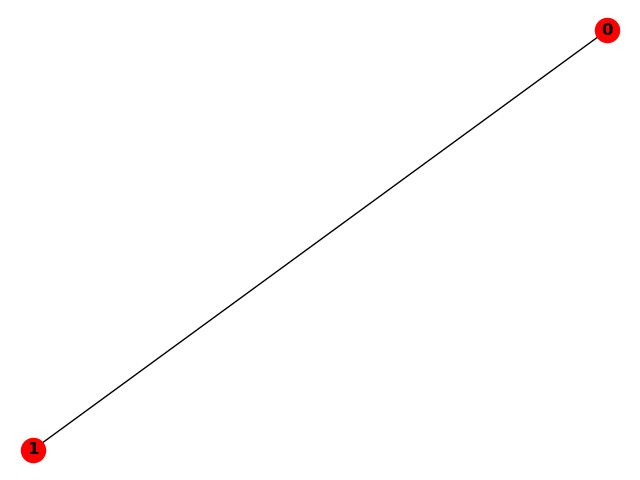

In [122]:
import networkx as nx
G = nx.Graph()
G.add_node(0)
G.add_node(1)

G.add_edge(0, 1, label='tere')
G.add_edge(1, 0)
plt.figure()
nx.draw(G, with_labels=True, font_weight='bold')

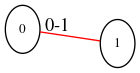

In [129]:
import pygraphviz as pgv
# A=pgv.AGraph(overlap='False', splines='true')
A=pgv.AGraph()


A.add_node(0, width='0.1', fontsize='10')
A.add_node(1, width='0.1', fontsize='10')
A.add_edge(1, 0, label='1-0', color='blue')
A.add_edge(0, 1, label='0-1', color='red')

# for i, x in enumerate(STATE_MACHINE):
#     print(i, x)
#     A.add_node(bitstr.from_int(i, 2), width='0.1', fontsize='10')
# #     if i != 1:
#     A.add_node(bitstr.from_int(x[0], 2), width='0.1', fontsize='10')
#     A.add_node(bitstr.from_int(x[2], 2), width='0.1', fontsize='10')
# #     A.add_edge(bitstr.from_int(i, 2), bitstr.from_int(x[0], 2), label=x[1], dir='forward', arrowsize='0.25', fontsize='7')
#     A.add_edge(bitstr.from_int(i, 2), bitstr.from_int(x[2], 2), label=x[3], dir='forward', arrowsize='0.25', fontsize='7')

# ValueError: Program asd is not one of: neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
A.layout() # layout with default (neato)
A.draw('/tmp/simple.png') # draw png
from IPython.display import Image
Image("/tmp/simple.png")

In [68]:
OUTPUT_LUT

['00', '10', '11', '01', '11', '01', '00', '10']

In [ ]:
import pygraphviz as pgv
BUTTERFLY_LUT = [(0, 0, 1, 3), (2, 2, 3, 1), (4, 0, 5, 3), (6, 2, 7, 1),
                     (8, 3, 9, 0), (10, 1, 11, 2), (12, 3, 13, 0), (14, 1, 15, 2),
                     (16, 3, 17, 0), (18, 1, 19, 2), (20, 3, 21, 0), (22, 1, 23, 2),
                     (24, 0, 25, 3), (26, 2, 27, 1), (28, 0, 29, 3), (30, 2, 31, 1),
                     (32, 1, 33, 2), (34, 3, 35, 0), (36, 1, 37, 2), (38, 3, 39, 0),
                     (40, 2, 41, 1), (42, 0, 43, 3), (44, 2, 45, 1), (46, 0, 47, 3),
                     (48, 2, 49, 1), (50, 0, 51, 3), (52, 2, 53, 1), (54, 0, 55, 3),
                     (56, 1, 57, 2), (58, 3, 59, 0), (60, 1, 61, 2), (62, 3, 63, 0),
                     (0, 3, 1, 0), (2, 1, 3, 2), (4, 3, 5, 0), (6, 1, 7, 2),
                     (8, 0, 9, 3), (10, 2, 11, 1), (12, 0, 13, 3), (14, 2, 15, 1),
                     (16, 0, 17, 3), (18, 2, 19, 1), (20, 0, 21, 3), (22, 2, 23, 1),
                     (24, 3, 25, 0), (26, 1, 27, 2), (28, 3, 29, 0), (30, 1, 31, 2),
                     (32, 2, 33, 1), (34, 0, 35, 3), (36, 2, 37, 1), (38, 0, 39, 3),
                     (40, 1, 41, 2), (42, 3, 43, 0), (44, 1, 45, 2), (46, 3, 47, 0),
                     (48, 1, 49, 2), (50, 3, 51, 0), (52, 1, 53, 2), (54, 3, 55, 0),
                     (56, 2, 57, 1), (58, 0, 59, 3), (60, 2, 61, 1), (62, 0, 63, 3)]

A=pgv.AGraph(overlap='False', splines='true')
for i, x in enumerate(BUTTERFLY_LUT):
    A.add_node(i, width='0.1', fontsize='10')
    A.add_edge(i, x[0], label=x[1], dir='forward', arrowsize='0.25', fontsize='7')
    A.add_edge(i, x[2], label=x[3], dir='forward', arrowsize='0.25', fontsize='7')
    A.add_node(i)

A.layout() # layout with default (neato)
A.draw('simple.png') # draw png
print("Wrote simple.png")